In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter


In [4]:
file_path = "D:/dataset/UPI/data/combined_UPI_apps_data.csv"
df = pd.read_csv(file_path)

df.head()

,Application Name,Year,Month,Volume Customer(Mn),Value Customer (Cr),Volume B2C (Mn),Value B2C (Cr),Volume B2B(Mn),Value B2B(Cr),Volume (Mn),Value (Cr)
0,Airtel Payments Bank Apps,2022,4,5.29,454.64,NaN,NaN,NaN,NaN,5.30,460.90
1,Amazon Pay,2022,4,73.21,6699.57,NaN,NaN,NaN,NaN,73.21,6699.57
2,AU Small Finance Bank App,2022,4,0.32,109.89,NaN,NaN,NaN,NaN,0.32,109.89
3,Axis Bank Apps,2022,4,7.19,1213.44,56.84,43.71,0.0,0.0,64.03,1257.15
4,Bajaj Finserv,2022,4,0.52,38.61,NaN,NaN,NaN,NaN,0.52,38.61


In [8]:
df[df['Year']==2024]['Value (Cr)'].sum()

22470422.06

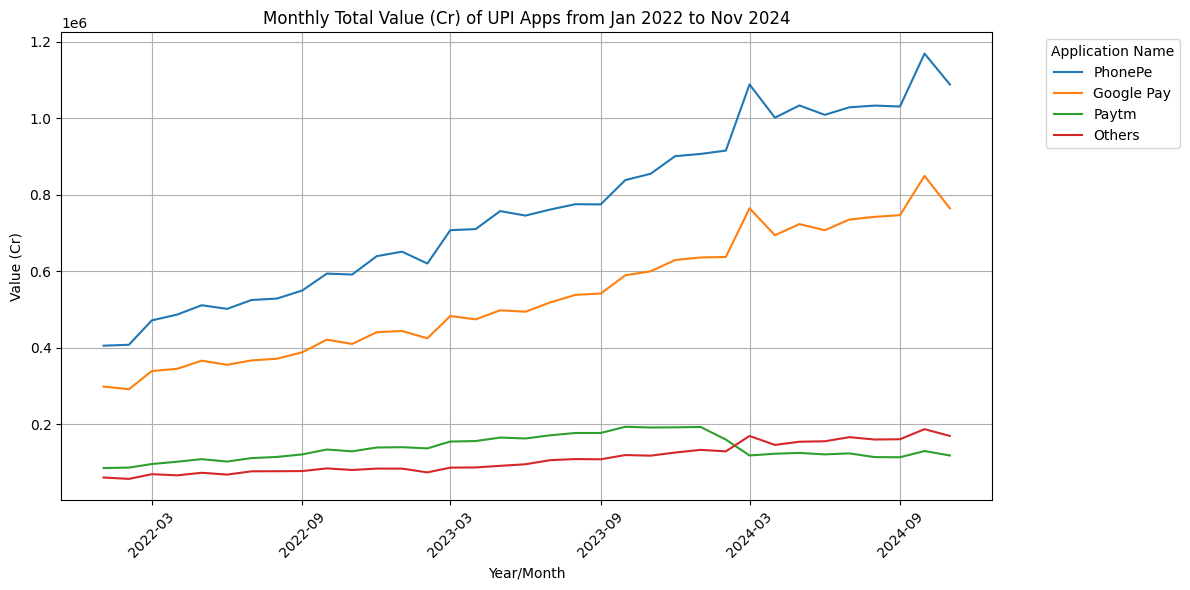

In [6]:
# Convert 'Year' and 'Month' to a datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# We will group by 'Date' and 'Application Name', summing the 'Volume (Mn)'
df_grouped = df.groupby(['Date', 'Application Name'])['Value (Cr)'].sum().reset_index()

# Calculate the total volume for each app across the entire period
total_volume_by_app = df_grouped.groupby('Application Name')['Value (Cr)'].sum()

# Get the top 3 apps and group all others under 'Others'
top_apps = total_volume_by_app.nlargest(3).index
df_grouped['Application Name'] = df_grouped['Application Name'].apply(
    lambda x: x if x in top_apps else 'Others'
)
# Group by 'Date' and 'Application Name' again to sum volumes after categorizing the 'Others'
df_grouped = df_grouped.groupby(['Date', 'Application Name'])['Value (Cr)'].sum().reset_index()

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot a line for each app, sorted by total volume
sorted_apps = total_volume_by_app.loc[df_grouped['Application Name'].unique()].sort_values(ascending=False).index

# Plot each app in the sorted order
for app in sorted_apps:
    app_data = df_grouped[df_grouped['Application Name'] == app]
    plt.plot(app_data['Date'], app_data['Value (Cr)'], label=app)

# Formatting the x-axis to show "Year/Month"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Set labels and title
plt.xlabel('Year/Month')
plt.ylabel('Value (Cr)')
plt.title('Monthly Total Value (Cr) of UPI Apps from Jan 2022 to Nov 2024')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to identify each app, arranged by total volume
plt.legend(title='Application Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display grid
plt.grid(True)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

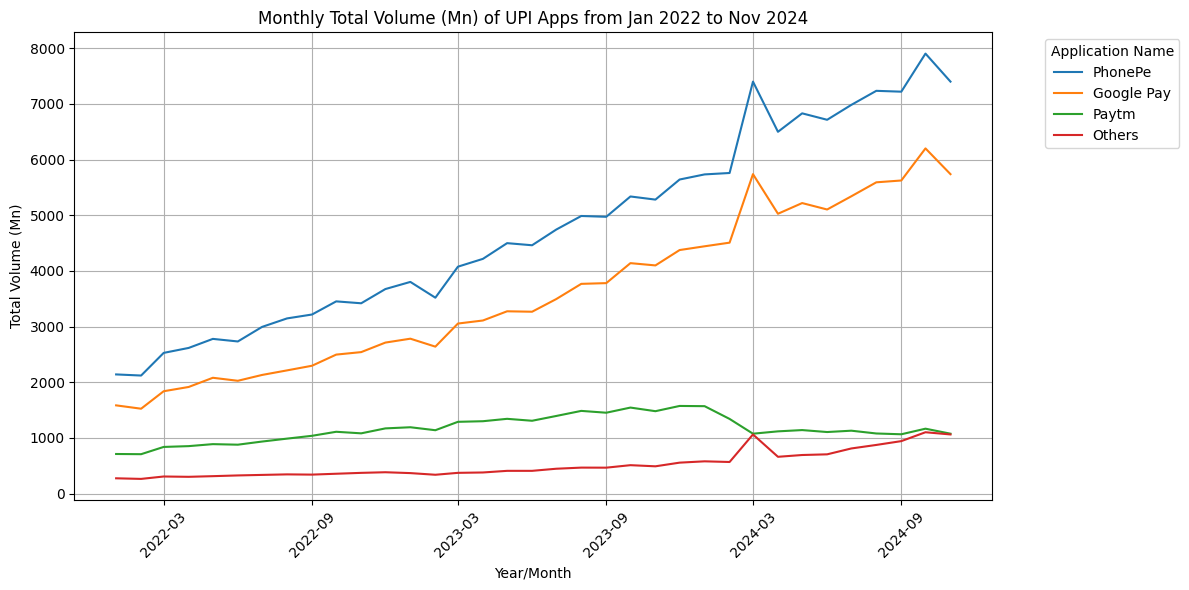

In [13]:
# Convert 'Year' and 'Month' to a datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# We will group by 'Date' and 'Application Name', summing the 'Volume (Mn)'
df_grouped = df.groupby(['Date', 'Application Name'])['Volume (Mn)'].sum().reset_index()

# Calculate the total volume for each app across the entire period
total_volume_by_app = df_grouped.groupby('Application Name')['Volume (Mn)'].sum()

# Get the top 3 apps and group all others under 'Others'
top_apps = total_volume_by_app.nlargest(3).index
df_grouped['Application Name'] = df_grouped['Application Name'].apply(
    lambda x: x if x in top_apps else 'Others'
)

# Group by 'Date' and 'Application Name' again to sum volumes after categorizing the 'Others'
df_grouped = df_grouped.groupby(['Date', 'Application Name'])['Volume (Mn)'].sum().reset_index()

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot a line for each app, sorted by total volume
# First, get the sorted list of apps by total volume
sorted_apps = total_volume_by_app.loc[df_grouped['Application Name'].unique()].sort_values(ascending=False).index

# Plot each app in the sorted order
for app in sorted_apps:
    app_data = df_grouped[df_grouped['Application Name'] == app]
    plt.plot(app_data['Date'], app_data['Volume (Mn)'], label=app)

# Formatting the x-axis to show "Year/Month"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Set labels and title
plt.xlabel('Year/Month')
plt.ylabel('Total Volume (Mn)')
plt.title('Monthly Total Volume (Mn) of UPI Apps from Jan 2022 to Nov 2024')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to identify each app, arranged by total volume
plt.legend(title='Application Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display grid
plt.grid(True)

# Adjust layout to prevent clipping
plt.tight_layout()

plt.savefig('D:\\dataset\\UPI\\visuals\\MontlyTotalVol.jpg') 
# Show the plot
plt.show()



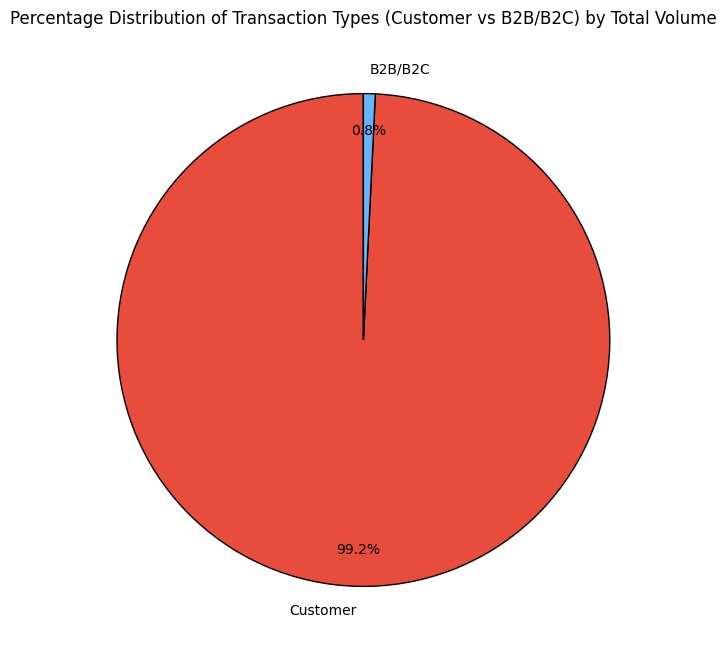

In [27]:
# Summing the total volume for each transaction type
total_volume_customer = df['Volume Customer(Mn)'].sum()
total_volume_b2c = df['Volume B2C (Mn)'].sum()
total_volume_b2b = df['Volume B2B(Mn)'].sum()

# Combine B2B and B2C volumes into one
total_volume_b2b_b2c = total_volume_b2c + total_volume_b2b

# Calculate the total volume
total_volume = total_volume_customer + total_volume_b2b_b2c

# Prepare data for the pie chart
labels = ['Customer', 'B2B/B2C']
sizes = [total_volume_customer, total_volume_b2b_b2c]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
        colors=['#e74c3c','#66b3ff'], 
        wedgeprops={'edgecolor': 'black'},  # Add borders to slices for clarity
        pctdistance=0.85,  # Distance of percentage text from the center
        labeldistance=1.1)  # Move labels outside the pie chart

# Title
plt.title('Percentage Distribution of Transaction Types (Customer vs B2B/B2C) by Total Volume')

# Display the plot
plt.show()

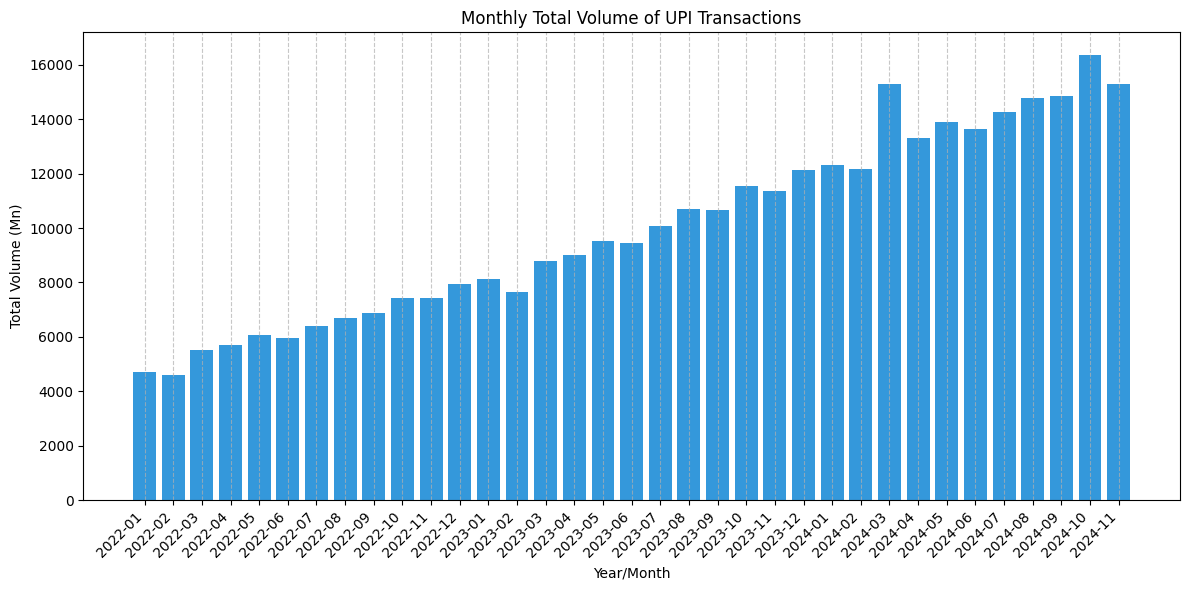

In [22]:
# Combine Year and Month to create a single time period column
df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)

# Group by Year_Month and sum the total volume for each month
df_monthly = df.groupby('Year_Month')['Volume (Mn)'].sum().reset_index()

# Plotting the monthly bar graph for total volume
plt.figure(figsize=(12, 6))
plt.bar(df_monthly['Year_Month'], df_monthly['Volume (Mn)'], color='#3498db')

# Set labels and title
plt.xlabel('Year/Month')
plt.ylabel('Total Volume (Mn)')
plt.title('Monthly Total Volume of UPI Transactions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display grid for better visibility
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

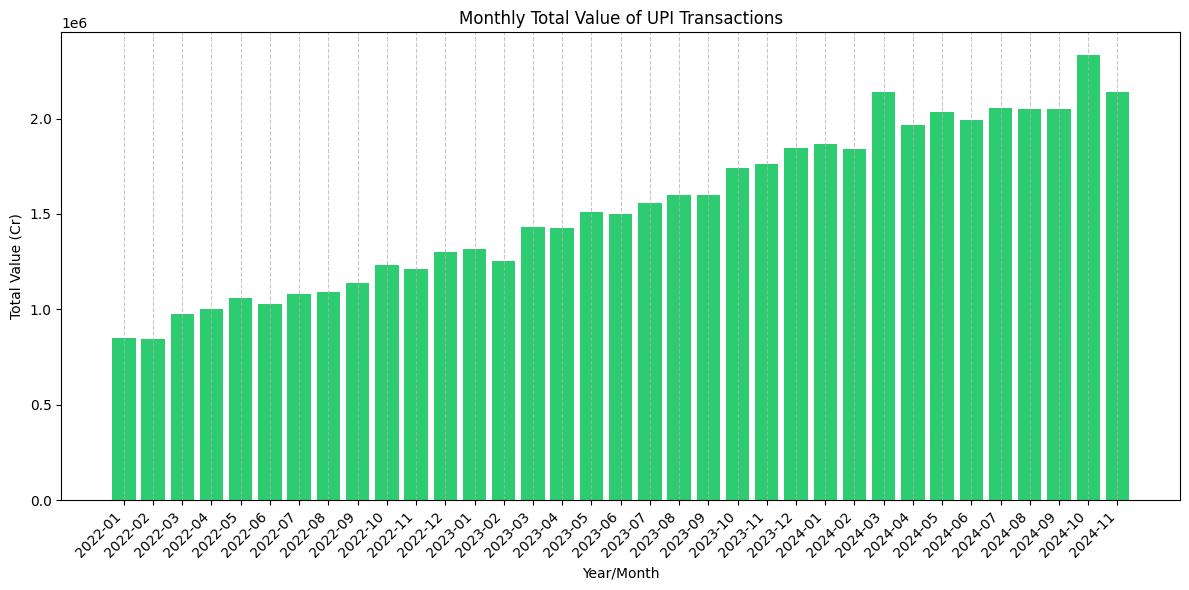

In [14]:
# Combine Year and Month to create a single time period column
df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)

# Group by Year_Month and sum the total volume for each month
df_monthly = df.groupby('Year_Month')['Value (Cr)'].sum().reset_index()

# Plotting the monthly bar graph for total volume
plt.figure(figsize=(12, 6))
plt.bar(df_monthly['Year_Month'], df_monthly['Value (Cr)'], color='#2ecc71')

# Set labels and title
plt.xlabel('Year/Month')
plt.ylabel('Total Value (Cr)')
plt.title('Monthly Total Value of UPI Transactions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display grid for better visibility
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()

plt.savefig('D:\\dataset\\UPI\\visuals\\MontlyTotalValuebar.jpg') 
plt.show()

In [17]:
df.groupby('Year_Month')['Value (Cr)'].sum().max()

2335087.68

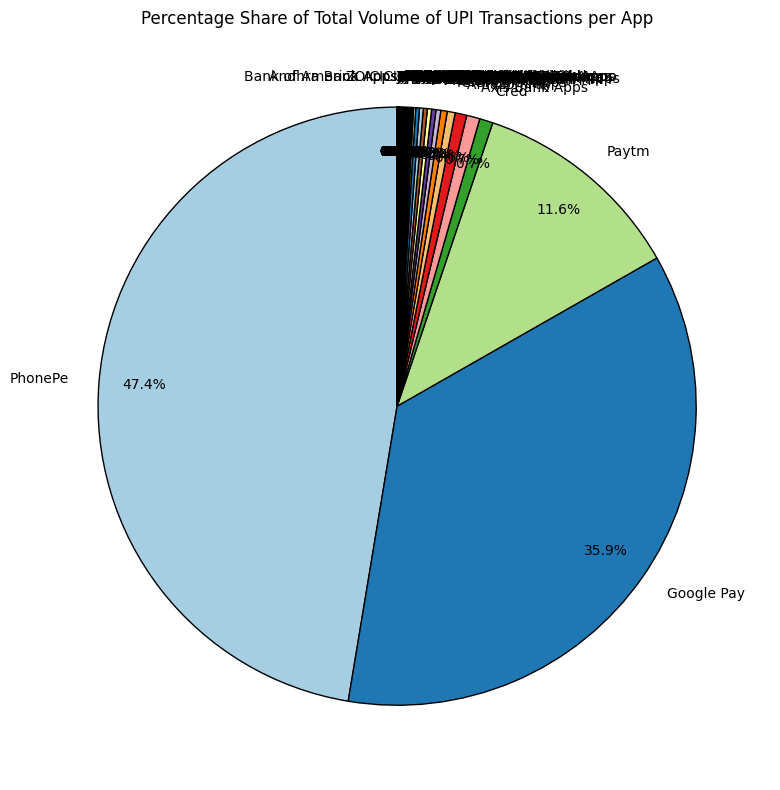

In [22]:
# Group by Application Name and sum the total volume for each app
app_volume = df.groupby('Application Name')['Volume (Mn)'].sum().reset_index()

# Sort the apps by total volume in descending order
app_volume = app_volume.sort_values(by='Volume (Mn)', ascending=False)

# Prepare data for the pie chart
labels = app_volume['Application Name']
sizes = app_volume['Volume (Mn)']

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
        colors=plt.cm.Paired.colors,  # Optional: Color palette for better visual appeal
        wedgeprops={'edgecolor': 'black'},  # Add borders to slices
        pctdistance=0.85,  # Distance of percentage text from the center
        labeldistance=1.1)  # Move labels outside the pie chart

# Title
plt.title('Percentage Share of Total Volume of UPI Transactions per App')

# Display the plot
plt.tight_layout()
plt.savefig('D:\\dataset\\UPI\\visuals\\percentagePiecharAppsoverl.jpg') 
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_11792\3522241253.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_apps = top_apps.append({'Application Name': 'Others', 'Volume (Mn)': others['Volume (Mn)']}, ignore_index=True)


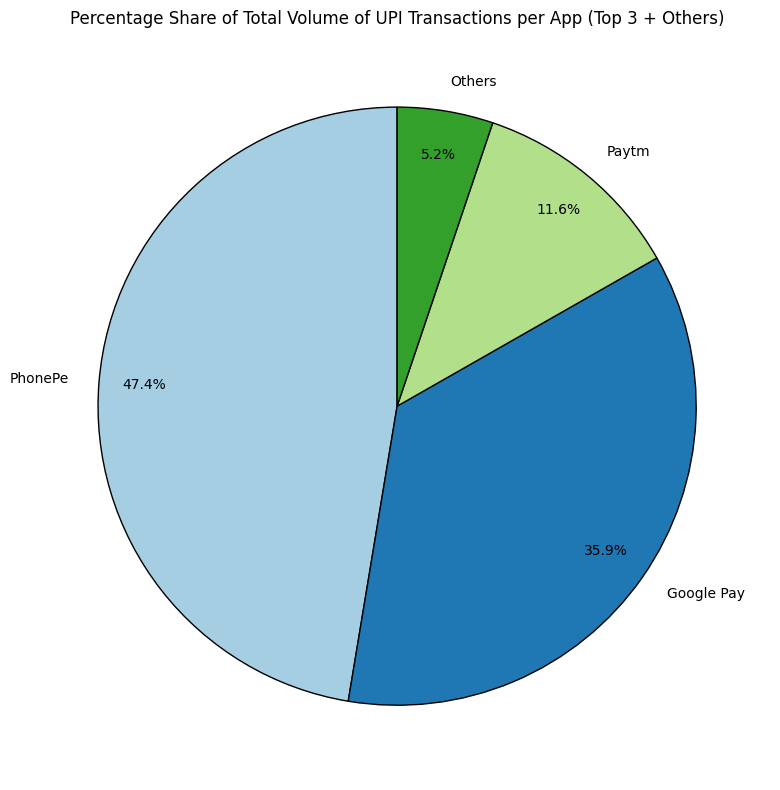

In [20]:
# Group by Application Name and sum the total volume for each app
app_volume = df.groupby('Application Name')['Volume (Mn)'].sum().reset_index()

# Sort the apps by total volume in descending order
app_volume = app_volume.sort_values(by='Volume (Mn)', ascending=False)

# Select top 4 apps and combine the rest as "Others"
top_apps = app_volume.head(3)
others = app_volume.iloc[3:].sum()

# Combine the "Others" category
top_apps = top_apps.append({'Application Name': 'Others', 'Volume (Mn)': others['Volume (Mn)']}, ignore_index=True)

# Prepare data for the pie chart
labels = top_apps['Application Name']
sizes = top_apps['Volume (Mn)']

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
        colors=plt.cm.Paired.colors,  # Optional: Color palette for better visual appeal
        wedgeprops={'edgecolor': 'black'},  # Add borders to slices
        pctdistance=0.85,  # Distance of percentage text from the center
        labeldistance=1.1)  # Move labels outside the pie chart

# Title
plt.title('Percentage Share of Total Volume of UPI Transactions per App (Top 3 + Others)')

# Display the plot
plt.tight_layout()
plt.savefig('D:\\dataset\\UPI\\visuals\\percentagePiecharApps.jpg') 
plt.show()

In [4]:
remBank_file_path = "D:/dataset/UPI/data/combined_RemitterBanks_data.csv"

bank_df = pd.read_csv(remBank_file_path)

In [5]:
bank_df.rename(columns={'\tTD%': 'TD'}, inplace=True)
bank_df['TD'] = bank_df['TD'].str.replace('%', '').astype(float)
# Convert 'Year' and 'Month' to a datetime column
bank_df['Date'] = pd.to_datetime(bank_df[['Year', 'Month']].assign(DAY=1))
bank_df.head()

,UPI Remitter Banks,Year,Month,Total Volume (In Mn),Approved %,BD %\t,TD,Total Debit Reversal Count (In Mn),Debit Reversal Success %,Date
0,State Bank of India,2022,4,1540.38,90.30%,6.87%,2.83%,8.38,95.68%,2022-04-01
1,HDFC Bank,2022,4,496.36,94.08%,5.31%,0.61%,3.29,95.17%,2022-04-01
2,Bank of Baroda,2022,4,360.74,93.18%,6.51%,0.31%,1.98,98.94%,2022-04-01
3,Union Bank of India,2022,4,346.76,91.35%,8.09%,0.57%,3.01,66.96%,2022-04-01
4,ICICI Bank,2022,4,325.45,94.17%,4.63%,1.20%,3.06,63.74%,2022-04-01


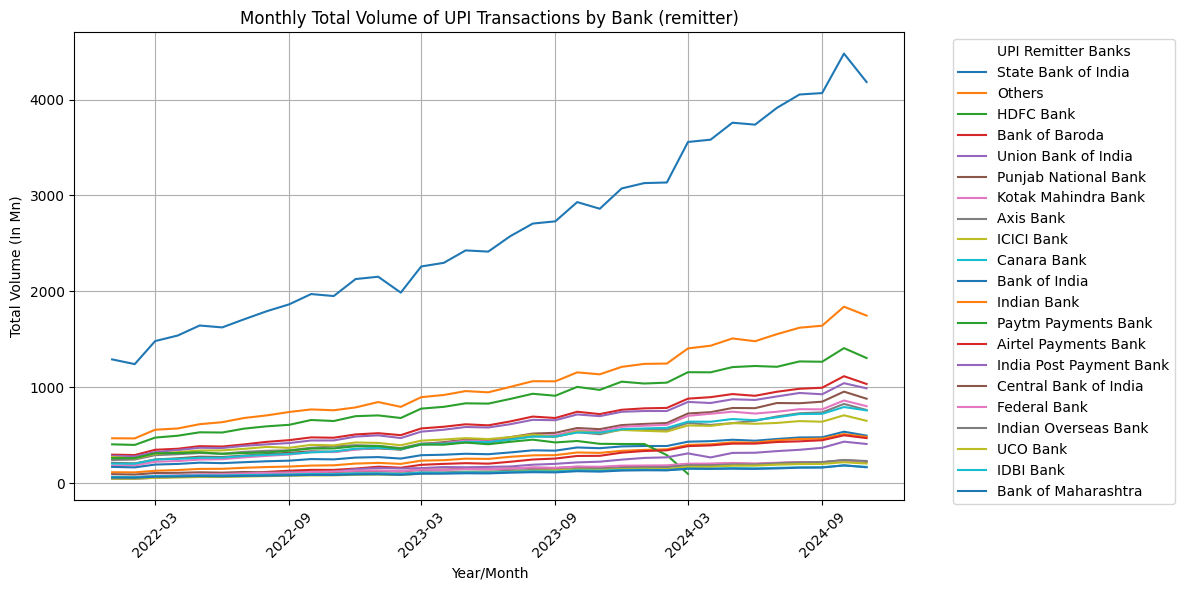

In [129]:

# We will group by 'Date' and 'UPI Remitter Banks', summing the 'Total Volume (In Mn)'
df_grouped = bank_df.groupby(['Date', 'UPI Remitter Banks'])['Total Volume (In Mn)'].sum().reset_index()

# Calculate the total volume for each bank across the entire period
total_volume_by_bank = df_grouped.groupby('UPI Remitter Banks')['Total Volume (In Mn)'].sum()

# Get the top 3 banks and group all others under 'Others'
top_banks = total_volume_by_bank.nlargest(20).index
df_grouped['UPI Remitter Banks'] = df_grouped['UPI Remitter Banks'].apply(
    lambda x: x if x in top_banks else 'Others'
)

# Group by 'Date' and 'UPI Remitter Banks' again to sum volumes after categorizing the 'Others'
df_grouped = df_grouped.groupby(['Date', 'UPI Remitter Banks'])['Total Volume (In Mn)'].sum().reset_index()

# Sort the banks based on total volume, including 'Others'
sorted_banks = df_grouped.groupby('UPI Remitter Banks')['Total Volume (In Mn)'].sum().sort_values(ascending=False).index

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot a line for each bank in the sorted order
for bank in sorted_banks:
    bank_data = df_grouped[df_grouped['UPI Remitter Banks'] == bank]
    plt.plot(bank_data['Date'], bank_data['Total Volume (In Mn)'], label=bank)

# Formatting the x-axis to show "Year/Month"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Set labels and title
plt.xlabel('Year/Month')
plt.ylabel('Total Volume (In Mn)')
plt.title('Monthly Total Volume of UPI Transactions by Bank (remitter)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to identify each bank
plt.legend(title='UPI Remitter Banks', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display grid
plt.grid(True)

# Adjust layout to prevent clipping
plt.tight_layout()

plt.savefig('D:\\dataset\\UPI\\visuals\\MontlyTotalVolumeBankLine.jpg') 

# Show the plot
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_1424\2946817352.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pie_data = top_banks.append(pd.Series(others_volume, index=['Others']))


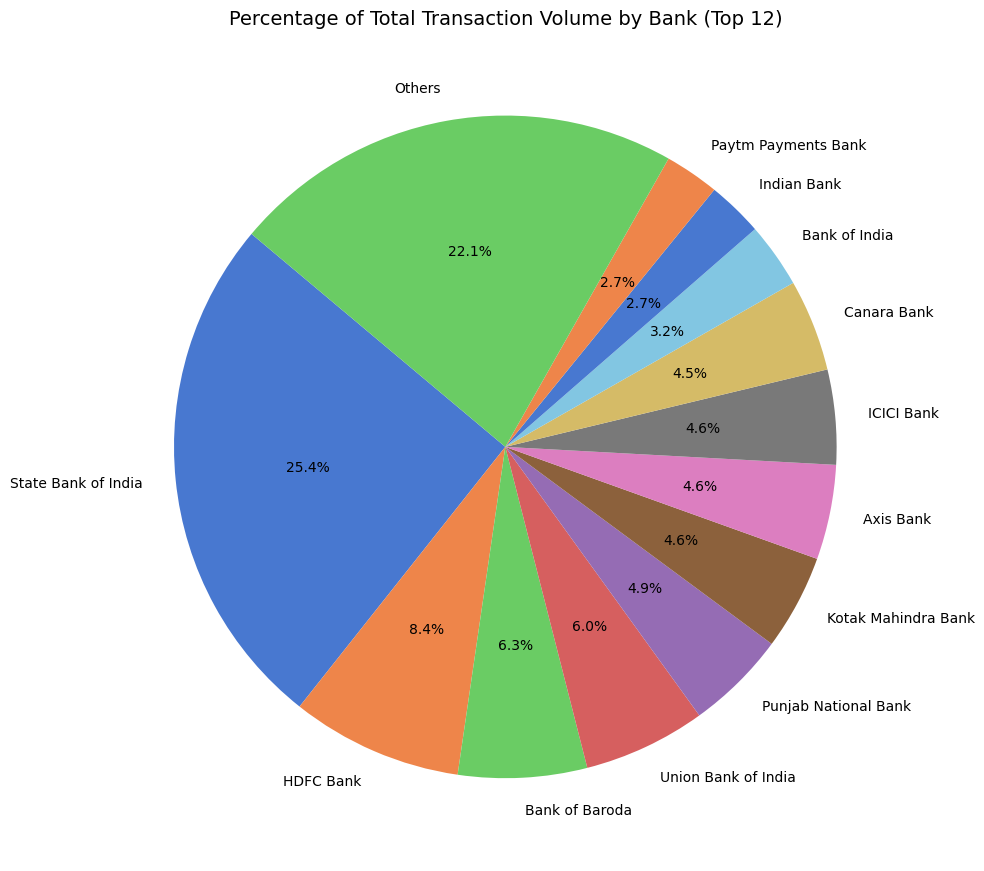

In [38]:
import seaborn as sns

# Calculate the total volume for each bank across the entire period
total_volume_by_bank = bank_df.groupby('UPI Remitter Banks')['Total Volume (In Mn)'].sum()

# Get the top 20 banks and group all others under 'Others'
top_banks = total_volume_by_bank.nlargest(12)
others_volume = total_volume_by_bank[~total_volume_by_bank.index.isin(top_banks.index)].sum()

# Combine top 20 banks with 'Others'
pie_data = top_banks.append(pd.Series(others_volume, index=['Others']))

# Use a modern color palette from seaborn
colors = sns.color_palette("muted", len(pie_data))  # 'muted' palette provides soft, modern colors

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 10}
)

# Set title
plt.title('Percentage of Total Transaction Volume by Bank (Top 12)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

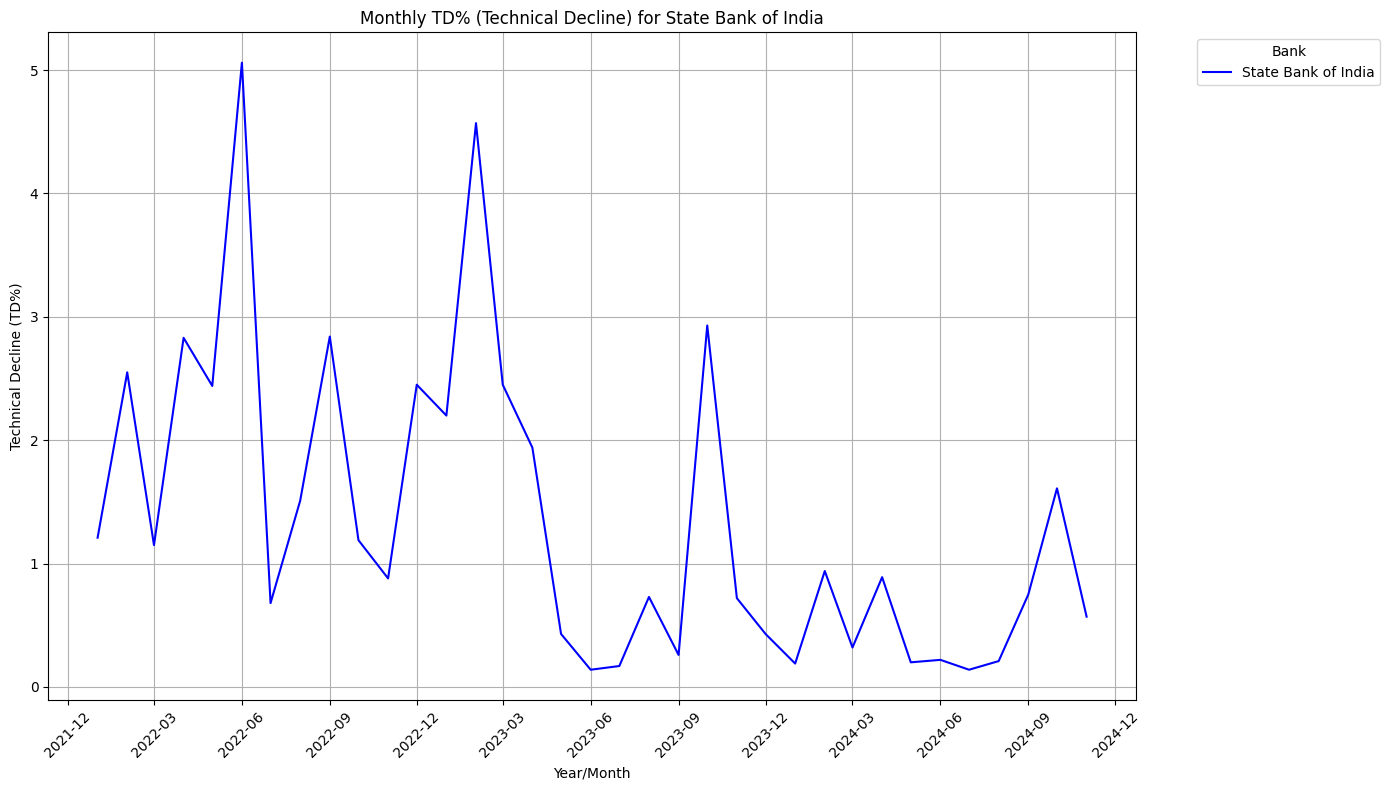

In [46]:
# Clean the TD column by removing '%' and converting to float
# bank_df['TD'] = bank_df['TD'].str.replace('%', '').astype(float)

# Convert 'Year' and 'Month' to a datetime column for easy grouping
# bank_df['Date'] = pd.to_datetime(bank_df[['Year', 'Month']].assign(DAY=1))

# Group data by 'Date' and 'UPI Remitter Banks', calculating the average TD% for each bank
td_grouped = bank_df.groupby(['Date', 'UPI Remitter Banks'])['TD'].mean().reset_index()

# Filter the data for State Bank of India
sbi_data = td_grouped[td_grouped['UPI Remitter Banks'] == 'State Bank of India']

# Create a figure for the line plot
plt.figure(figsize=(14, 8))

# Plot the line graph for State Bank of India
plt.plot(sbi_data['Date'], sbi_data['TD'], label='State Bank of India', color='b')

# Format the x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Set labels, title, and legend
plt.xlabel('Year/Month')
plt.ylabel('Technical Decline (TD%)')
plt.title('Monthly TD% (Technical Decline) for State Bank of India')
plt.xticks(rotation=45)
plt.legend(title='Bank', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid and adjust layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [118]:
grpd = bankdf.groupby(['Year','UPI Beneficiary Banks'])['TD'].mean().reset_index()

In [121]:
sbimean = grpd[grpd['UPI Beneficiary Banks']=='YES Bank']

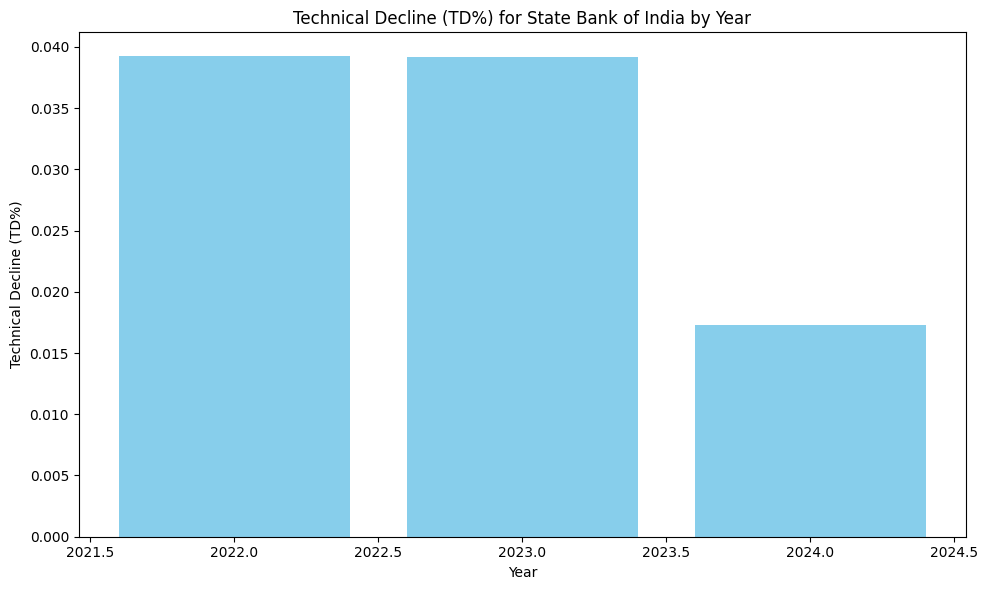

In [122]:
# Create a figure for the bar plot
plt.figure(figsize=(10, 6))

# Plot a bar graph for 'TD' with 'Year' on the x-axis
plt.bar(sbimean['Year'], sbimean['TD'], color='skyblue')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Technical Decline (TD%)')
plt.title('Technical Decline (TD%) for State Bank of India by Year')

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
bank_df.head()

,UPI Remitter Banks,Year,Month,Total Volume (In Mn),Approved %,BD %\t,TD,Total Debit Reversal Count (In Mn),Debit Reversal Success %,Date
0,State Bank of India,2022,4,1540.38,90.30%,6.87%,2.83%,8.38,95.68%,2022-04-01
1,HDFC Bank,2022,4,496.36,94.08%,5.31%,0.61%,3.29,95.17%,2022-04-01
2,Bank of Baroda,2022,4,360.74,93.18%,6.51%,0.31%,1.98,98.94%,2022-04-01
3,Union Bank of India,2022,4,346.76,91.35%,8.09%,0.57%,3.01,66.96%,2022-04-01
4,ICICI Bank,2022,4,325.45,94.17%,4.63%,1.20%,3.06,63.74%,2022-04-01


In [12]:
# Ensure the column is numeric
bank_df['Total Debit Reversal Count (In Mn)'] = pd.to_numeric(bank_df['Total Debit Reversal Count (In Mn)'], errors='coerce')

In [34]:
TBRC = bank_df.groupby(['Year','Month'])['Total Debit Reversal Count (In Mn)'].sum().reset_index()
total_vol = bank_df.groupby(['Year','Month'])['Total Volume (In Mn)'].sum().reset_index()

TD = bank_df.groupby(['Year','Month'])['TD'].mean().reset_index()

In [36]:
#scale up TD for the plotting
TD["TD"] = TD["TD"]*10

In [ ]:
#scale down total_vol for plotting
total_vol['Total Volume (In Mn)'] = total_vol['Total Volume (In Mn)']/50

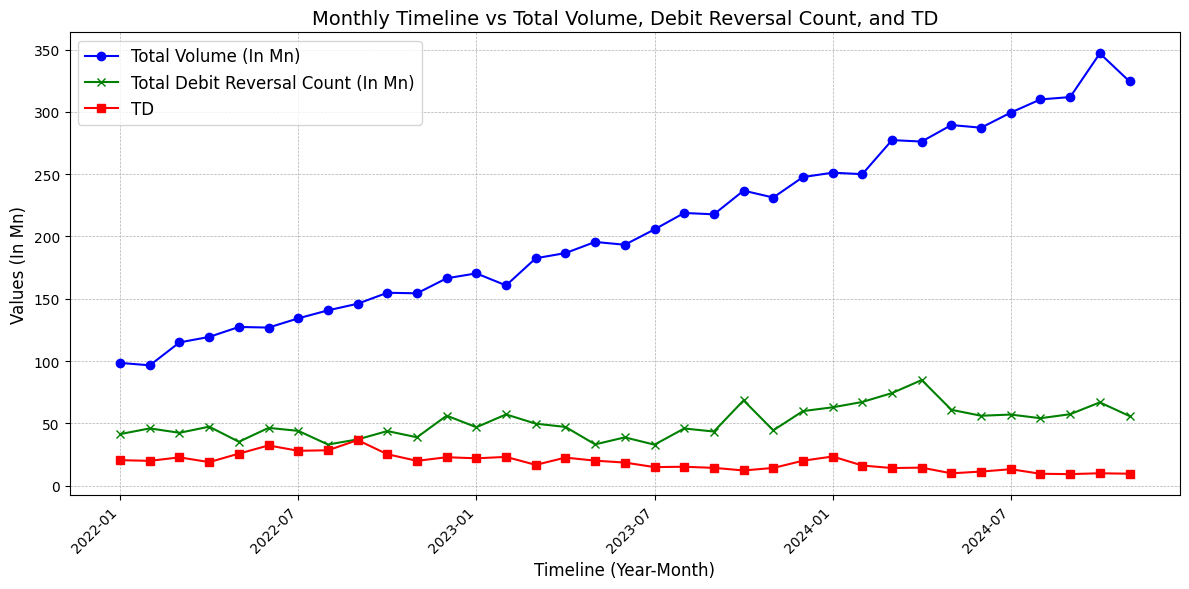

In [42]:
# Merge all dataframes on Year and Month
merged_df = pd.merge(TBRC, total_vol, on=['Year', 'Month'], how='outer')
merged_df = pd.merge(merged_df, TD, on=['Year', 'Month'], how='outer')

# Create a combined x-axis label
merged_df['Timeline'] = merged_df['Year'].astype(str) + '-' + merged_df['Month'].astype(str).str.zfill(2)

# Plotting
plt.figure(figsize=(12, 6))

# Plot each series
plt.plot(merged_df['Timeline'], merged_df['Total Volume (In Mn)'], color='blue', marker='o', label='Total Volume (In Mn)')
plt.plot(merged_df['Timeline'], merged_df['Total Debit Reversal Count (In Mn)'], color='green', marker='x', label='Total Debit Reversal Count (In Mn)')
plt.plot(merged_df['Timeline'], merged_df['TD'], color='red', marker='s', label='TD')

# Labels, title, and legend
plt.xlabel('Timeline (Year-Month)', fontsize=12)
plt.ylabel('Scaled Values', fontsize=12)
plt.title('Total Volume, Debit Reversal Count, and TD%', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Reduce x-axis labels, display every 6 months
tick_positions = range(0, len(merged_df), 6)
tick_labels = merged_df['Timeline'].iloc[tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')

plt.tight_layout()

# Show the plot
plt.show()

In [45]:
benBank_path = "D:/dataset/UPI/data/combined_BeneficiaryBanks_data.csv"

bankdf = pd.read_csv(benBank_path)

In [48]:
bankdf.rename(columns={'\tTD%': 'TD'}, inplace=True)
bankdf['TD'] = bankdf['TD'].str.replace('%', '').astype(float)
# Convert 'Year' and 'Month' to a datetime column
bankdf['Date'] = pd.to_datetime(bank_df[['Year', 'Month']].assign(DAY=1))
bankdf.head()

,Sr.No.,UPI Beneficiary Banks,Year,Month,Total Volume (In Mn),Approved %,BD %\t,TD,Deemed Approved %,Column 8,Date
0,1,Paytm Payments Bank,2022,4,1265.52,99.73%,0.27%,0.01,0.00%,NaN,2022-04-01
1,2,YES Bank,2022,4,745.77,99.78%,0.05%,0.08,0.09%,NaN,2022-04-01
2,3,State Bank of India,2022,4,741.10,98.05%,0.30%,1.22,0.42%,NaN,2022-04-01
3,4,Axis Bank,2022,4,408.62,98.28%,1.25%,0.06,0.41%,NaN,2022-04-01
4,5,ICICI Bank,2022,4,406.50,98.68%,0.42%,0.56,0.34%,NaN,2022-04-01


In [64]:
sbi_ben = bankdf[bankdf['UPI Beneficiary Banks']=='State Bank of India'].groupby(['Year','Month'])['Total Volume (In Mn)'].sum().reset_index()
sbi_rem = bank_df[bank_df['UPI Remitter Banks']=='State Bank of India'].groupby(['Year','Month'])['Total Volume (In Mn)'].sum().reset_index()

In [67]:
sbi_merged = pd.merge(sbi_ben, sbi_rem, on=['Year', 'Month'], how='outer')
sbi_merged

,Year,Month,Total Volume (In Mn)_x,Total Volume (In Mn)_y
0,2022,1,647.80,1291.88
1,2022,2,618.15,1242.45
2,2022,3,737.53,1482.61
3,2022,4,741.10,1540.38
4,2022,5,771.93,1644.91
5,2022,6,764.66,1625.09
6,2022,7,802.56,1709.44
7,2022,8,818.72,1793.55
8,2022,9,841.59,1865.75
9,2022,10,889.56,1972.78


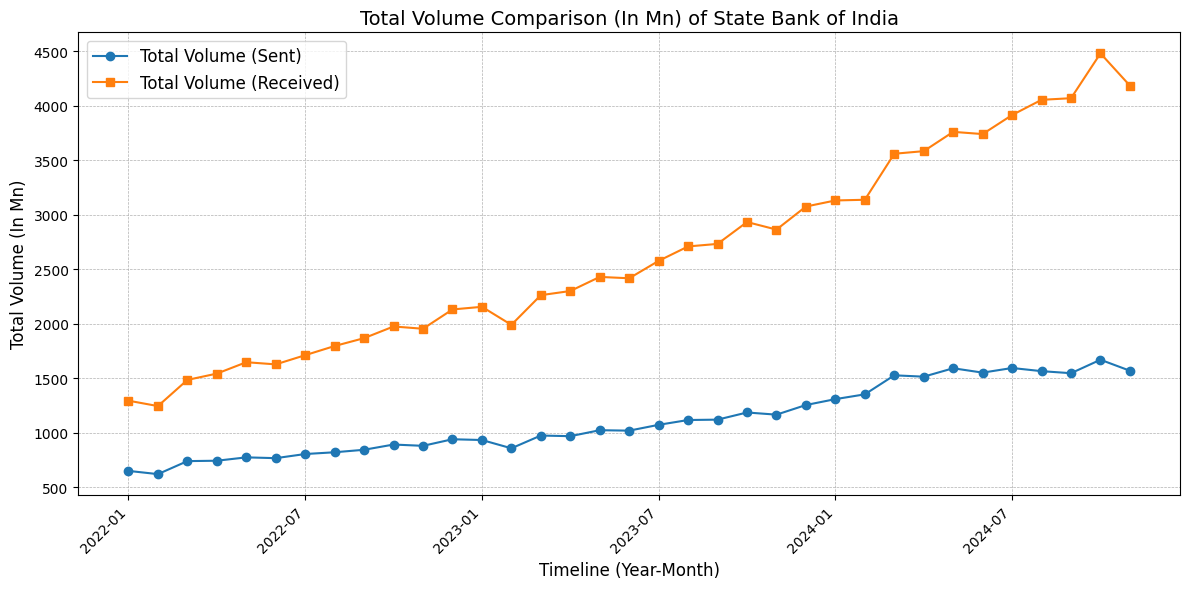

In [71]:
# Create a combined x-axis label (Year-Month format)
sbi_merged['Timeline'] = sbi_merged['Year'].astype(str) + '-' + sbi_merged['Month'].astype(str).str.zfill(2)

# Plotting
plt.figure(figsize=(12, 6))

# Use modern color schemes (e.g., Seaborn's color palette)
plt.plot(sbi_merged['Timeline'], sbi_merged['Total Volume (In Mn)_x'], color='#1f77b4', marker='o', label='Total Volume (Sent)')
plt.plot(sbi_merged['Timeline'], sbi_merged['Total Volume (In Mn)_y'], color='#ff7f0e', marker='s', label='Total Volume (Received)')

# Labels, title, and legend
plt.xlabel('Timeline (Year-Month)', fontsize=12)
plt.ylabel('Total Volume (In Mn)', fontsize=12)
plt.title('Total Volume Comparison (In Mn) of State Bank of India', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Reduce x-axis labels to prevent overlap (display at intervals of 1)
plt.xticks(rotation=45, ha='right')
# Reduce x-axis labels, display every 6 months
tick_positions = range(0, len(merged_df), 6)
tick_labels = merged_df['Timeline'].iloc[tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')

plt.tight_layout()

# Show the plot
plt.show()

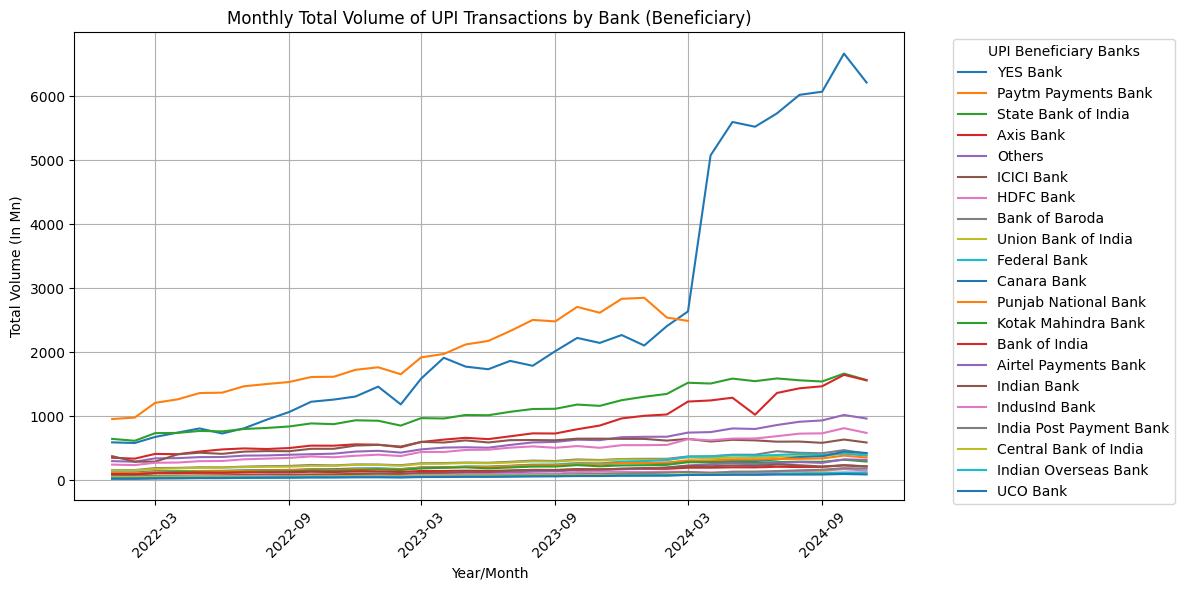

In [130]:

# We will group by 'Date' and 'UPI Remitter Banks', summing the 'Total Volume (In Mn)'
df_grouped = bankdf.groupby(['Date', 'UPI Beneficiary Banks'])['Total Volume (In Mn)'].sum().reset_index()

# Calculate the total volume for each bank across the entire period
total_volume_by_bank = df_grouped.groupby('UPI Beneficiary Banks')['Total Volume (In Mn)'].sum()

# Get the top 3 banks and group all others under 'Others'
top_banks = total_volume_by_bank.nlargest(20).index
df_grouped['UPI Beneficiary Banks'] = df_grouped['UPI Beneficiary Banks'].apply(
    lambda x: x if x in top_banks else 'Others'
)

# Group by 'Date' and 'UPI Remitter Banks' again to sum volumes after categorizing the 'Others'
df_grouped = df_grouped.groupby(['Date', 'UPI Beneficiary Banks'])['Total Volume (In Mn)'].sum().reset_index()

# Sort the banks based on total volume, including 'Others'
sorted_banks = df_grouped.groupby('UPI Beneficiary Banks')['Total Volume (In Mn)'].sum().sort_values(ascending=False).index

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot a line for each bank in the sorted order
for bank in sorted_banks:
    bank_data = df_grouped[df_grouped['UPI Beneficiary Banks'] == bank]
    plt.plot(bank_data['Date'], bank_data['Total Volume (In Mn)'], label=bank)

# Formatting the x-axis to show "Year/Month"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Set labels and title
plt.xlabel('Year/Month')
plt.ylabel('Total Volume (In Mn)')
plt.title('Monthly Total Volume of UPI Transactions by Bank (Beneficiary)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to identify each bank
plt.legend(title='UPI Beneficiary Banks', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display grid
plt.grid(True)

# Adjust layout to prevent clipping
plt.tight_layout()

plt.savefig('D:\\dataset\\UPI\\visuals\\MontlyTotalVolumeBankLineBen.jpg') 

# Show the plot
plt.show()

In [136]:
# Filter data for Year == 2024
bank_df_2024 = bank_df[bank_df["Year"] == 2024]
bankdf_2024 = bankdf[bankdf["Year"] == 2024]

# YES Bank Total Volume (Received and Sent)
yes_bank_totalReceived = bank_df_2024[bank_df_2024["UPI Remitter Banks"] == "YES Bank"]['Total Volume (In Mn)'].sum()
yes_bank_totalSent = bankdf_2024[bankdf_2024["UPI Beneficiary Banks"] == "YES Bank"]['Total Volume (In Mn)'].sum()

# State Bank of India Total Volume (Received and Sent)
sbi_totalReceived = bank_df_2024[bank_df_2024["UPI Remitter Banks"] == "State Bank of India"]['Total Volume (In Mn)'].sum()
sbi_totalSent = bankdf_2024[bankdf_2024["UPI Beneficiary Banks"] == "State Bank of India"]['Total Volume (In Mn)'].sum()


SBI
Total Sent : 41592
Total Received : 16765

YES Bank
Total Sent : 1338
Total Received : 54050

In million transactions (from Jan2024 to Nov2024)


In [141]:
16765/41592

0.40308232352375456

In [140]:
54050/1338

40.39611360239163

In [79]:
all_rem = bank_df.groupby(['Year','Month','UPI Remitter Banks'])['Total Volume (In Mn)'].sum().reset_index()
all_ben = bankdf.groupby(['Year','Month','UPI Beneficiary Banks'])['Total Volume (In Mn)'].sum().reset_index()

In [88]:
all_rem.rename(columns={'UPI Remitter Banks': 'Bank', 'Total Volume (In Mn)': 'Total Rem Volume'}, inplace=True)

In [85]:
all_ben.rename(columns={'UPI Beneficiary Banks': 'Bank', 'Total Volume (In Mn)': 'Total Ben Volume'}, inplace=True)

In [92]:
all_trans_merged = pd.merge(all_rem, all_ben, on=['Year', 'Month','Bank'], how='outer')

In [94]:
all_trans_merged['total'] = all_trans_merged['Total Rem Volume'] + all_trans_merged['Total Ben Volume']

In [95]:
all_trans_merged.head()

,Year,Month,Bank,Total Rem Volume,Total Ben Volume,total
0,2022,1,AU Small Finance Bank,10.33,9.54,19.87
1,2022,1,Airtel Payments Bank,62.35,50.67,113.02
2,2022,1,Andhra Pradesh Grameena Vikas Bank,12.37,6.04,18.41
3,2022,1,Andhra Pragathi Grameena Bank,8.63,4.12,12.75
4,2022,1,Axis Bank,243.68,353.13,596.81


In [98]:
import seaborn as sns

In [1]:
# Create a combined date column for easier plotting
all_trans_merged['Date'] = pd.to_datetime(all_trans_merged['Year'].astype(str) + '-' + all_trans_merged['Month'].astype(str) + '-01')

# Generate the full date range (from Jan 2022 to Nov 2024)
full_date_range = pd.date_range(start='2022-01-01', end='2024-11-01', freq='MS')

# Pivot the data so that we have each bank's volume for each month
bank_volume_data = all_trans_merged.pivot_table(index='Date', columns='Bank', values='total', aggfunc='sum')

# Select top 10 banks by the total sum of their transaction volume
top_10_banks = bank_volume_data.sum().nlargest(10).index
bank_volume_data_top_10 = bank_volume_data[top_10_banks]

# Use Seaborn's color palette for better aesthetic appeal
colors = sns.color_palette("muted", len(bank_volume_data_top_10.columns))

# Plotting
plt.figure(figsize=(5, 8))

# Plot the data for each of the top 10 banks
for bank, color in zip(bank_volume_data_top_10.columns, colors):
    plt.plot(bank_volume_data_top_10.index, bank_volume_data_top_10[bank], label=bank, color=color, linewidth=2)

# Labels, title, and legend
plt.xlabel('Timeline (Year-Month)', fontsize=12)
plt.ylabel('Total Transaction Volume (in million)', fontsize=12)
plt.title('Monthly Transaction Volume for Top 10 Banks', fontsize=14)
plt.legend(title="Bank", fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(full_date_range, rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Formatting the x-axis to show "Year/Month"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Adjust layout to prevent clipping
plt.tight_layout()

plt.savefig('D:\\dataset\\UPI\\visuals\\top10bankalltrans.jpg') 
# Show the plot
plt.show()

NameError: name 'pd' is not defined

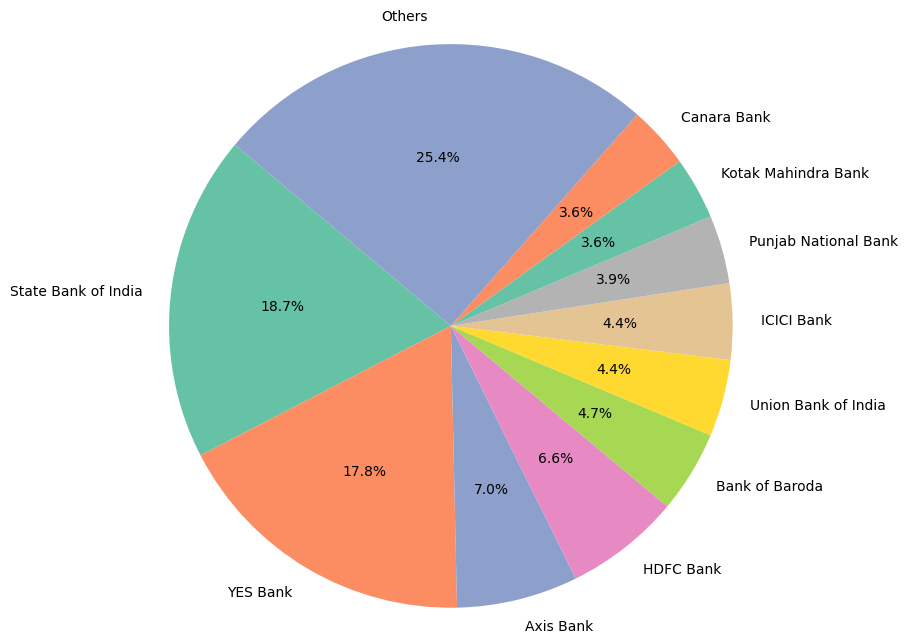

In [113]:
# Create a combined date column for easier plotting
all_trans_merged['Date'] = pd.to_datetime(all_trans_merged['Year'].astype(str) + '-' + all_trans_merged['Month'].astype(str) + '-01')

# Filter data for the year 2024
data_2024 = all_trans_merged[all_trans_merged['Year'] == 2024]

# Pivot the data so that we have each bank's volume for each month
bank_volume_data_2024 = data_2024.pivot_table(index='Date', columns='Bank', values='total', aggfunc='sum')

# Select top 10 banks by the total sum of their transaction volume in 2024
top_10_banks_2024 = bank_volume_data_2024.sum().nlargest(10).index
bank_volume_data_top_10_2024 = bank_volume_data_2024[top_10_banks_2024]

# Calculate total volume for each bank in 2024
bank_total_transaction_2024 = bank_volume_data_top_10_2024.sum()

# Identify banks that are not in the top 10 and group them under 'Others'
other_banks_transaction_2024 = bank_volume_data_2024.drop(columns=top_10_banks_2024).sum()
bank_total_transaction_2024['Others'] = other_banks_transaction_2024.sum()

# Create a custom color palette with distinct colors for each bank and 'Others'
colors = sns.color_palette("Set2", len(bank_total_transaction_2024))

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(bank_total_transaction_2024, labels=bank_total_transaction_2024.index, autopct='%1.1f%%', startangle=140, 
        colors=colors)
# plt.title('Percentage of Total Transactions by Banks in 2024 (Top 10 + Others)', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [125]:
all_trans_merged[all_trans_merged['Bank']=='YES Bank']

,Year,Month,Bank,Total Rem Volume,Total Ben Volume,total,Date
49,2022,1,YES Bank,49.25,593.69,642.94,2022-01-01
99,2022,2,YES Bank,53.95,583.50,637.45,2022-02-01
149,2022,3,YES Bank,61.53,678.13,739.66,2022-03-01
199,2022,4,YES Bank,61.17,745.77,806.94,2022-04-01
249,2022,5,YES Bank,68.85,811.13,879.98,2022-05-01
299,2022,6,YES Bank,73.71,731.88,805.59,2022-06-01
349,2022,7,YES Bank,92.32,813.04,905.36,2022-07-01
399,2022,8,YES Bank,91.23,947.28,1038.51,2022-08-01
449,2022,9,YES Bank,99.75,1067.95,1167.70,2022-09-01
499,2022,10,YES Bank,92.51,1227.74,1320.25,2022-10-01
